In [1]:
import pyfmi
from pyfmi.examples import fmi_bouncing_ball_cs
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
fmu_file = Path(fmi_bouncing_ball_cs.curr_dir) / 'files' / 'FMUs' / 'CS1.0' / 'bouncingBall.fmu'

## Run full simulation

In [3]:
model = pyfmi.load_fmu(fmu_file.as_posix())

In [4]:
res = model.simulate(final_time=2)

Simulation interval    : 0.0 - 2.0 seconds.
Elapsed simulation time: 0.039186 seconds.


In [5]:
res.result_data.description

[u'Time in [s]',
 u'height, used as state',
 u'velocity of ball',
 u'velocity of ball, used as state',
 u'acceleration of ball',
 u'acceleration of gravity',
 u'dimensionless parameter']

In [6]:
res.result_data.name

[u'time', u'h', u'der(h)', u'v', u'der(v)', u'g', u'e']

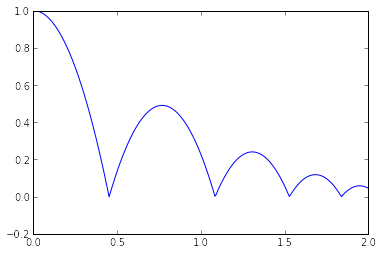

In [7]:
plt.plot(res['time'], res['h'])

In [8]:
model.simulate(final_time=4)

FMUException: The slave failed to initialize. See the log for possibly more information.

Simulation cannot be continued.

In [9]:
del model
(Path('.') / 'bouncingBall_log.txt').unlink()
(Path('.') / 'bouncingBall_result.txt').unlink()

## Proper Co-Simulation

In [10]:
T_START = 0
T_END = 2
NUMBER_TIME_STEPS = 40
T_STEP_SIZE = float(T_END) / NUMBER_TIME_STEPS
TIME_STEPS = np.linspace(T_START, T_END, NUMBER_TIME_STEPS)

In [11]:
model = pyfmi.load_fmu(fmu_file.as_posix())
model.instantiate_slave()
model.initialize(T_START, T_END, True)

In [12]:
h = [model.get('h')]
for t in TIME_STEPS:
    model.do_step(t, T_STEP_SIZE, new_step=True)
    h.append(model.get('h'))

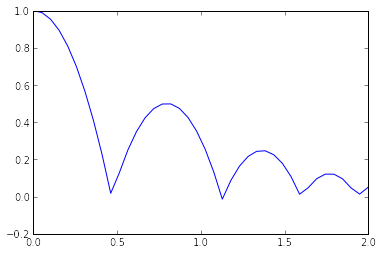

In [13]:
plt.plot(TIME_STEPS, h[:-1])

In [14]:
del model
(Path('.') / 'bouncingBall_log.txt').unlink()